# Review

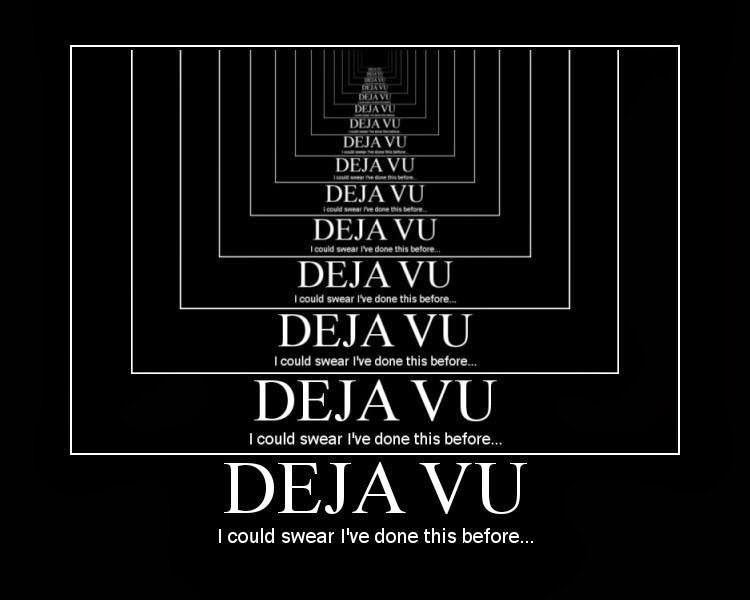

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Groupby" data-toc-modified-id="Groupby-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Groupby</a></span></li><li><span><a href="#Apply" data-toc-modified-id="Apply-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Apply</a></span><ul class="toc-item"><li><span><a href="#Operations-along-axis-0-(&quot;index&quot;)" data-toc-modified-id="Operations-along-axis-0-(&quot;index&quot;)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Operations along axis 0 ("index")</a></span></li><li><span><a href="#Operations-along-axis-1-(column)" data-toc-modified-id="Operations-along-axis-1-(column)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Operations along axis 1 (column)</a></span></li><li><span><a href="#Combining-apply-with-lambda-functions" data-toc-modified-id="Combining-apply-with-lambda-functions-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Combining apply with lambda functions</a></span></li></ul></li><li><span><a href="#Import-modules-from-custom-locations" data-toc-modified-id="Import-modules-from-custom-locations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import modules from custom locations</a></span></li><li><span><a href="#Loops-in-Python" data-toc-modified-id="Loops-in-Python-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Loops in Python</a></span></li></ul></div>

## Groupby 
[docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)
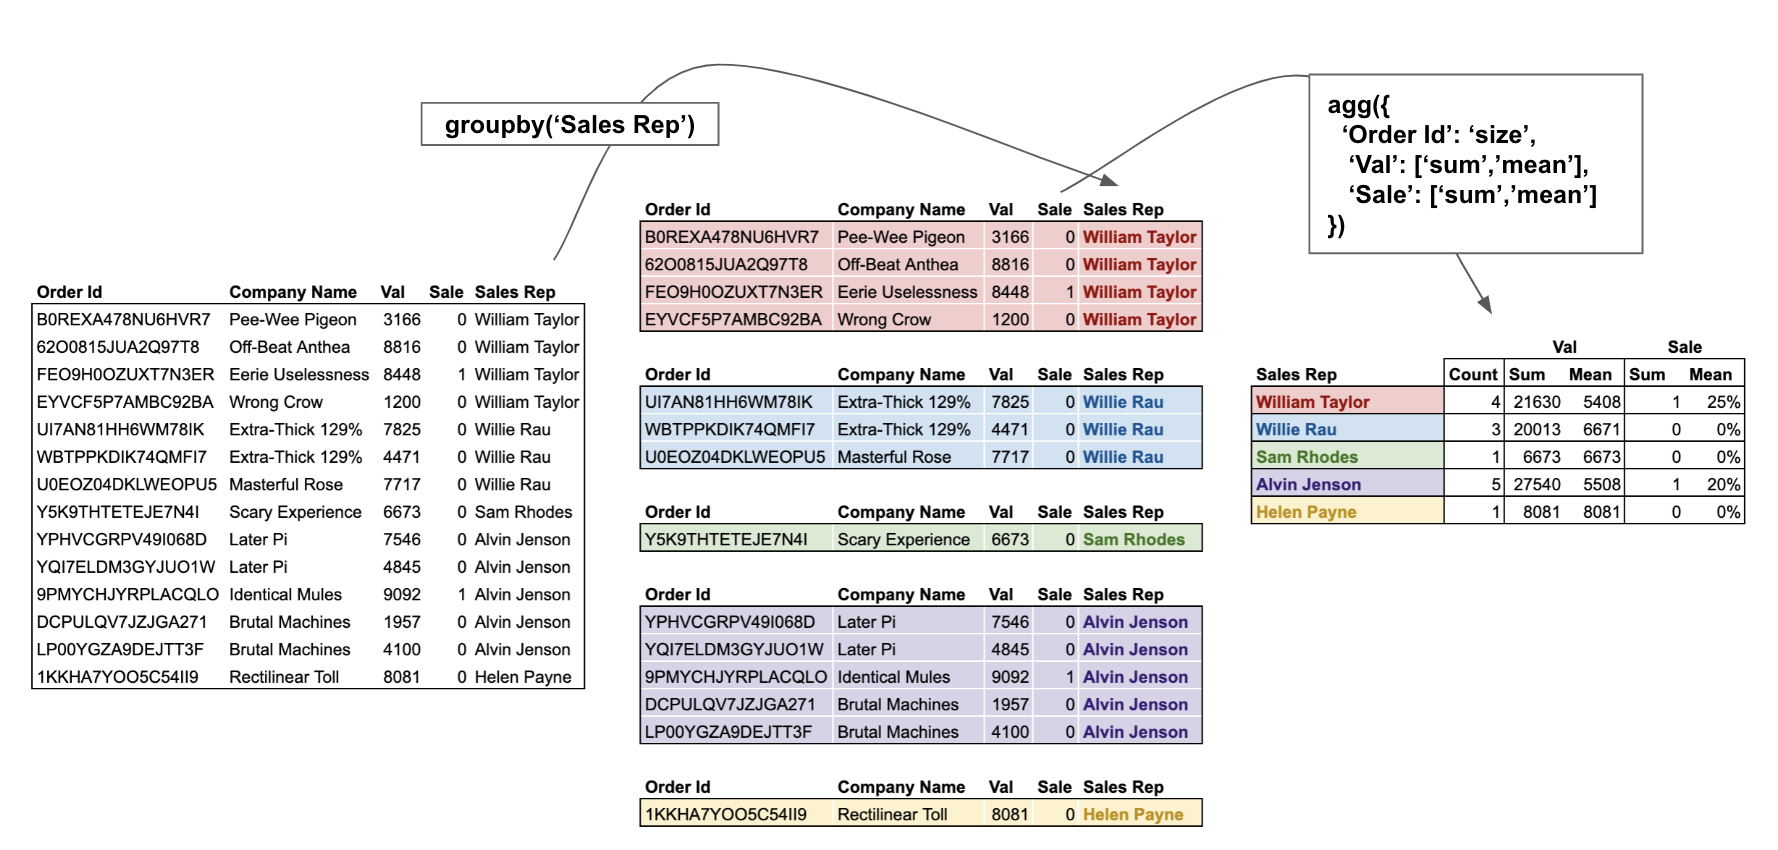
[towardsdatascience post](https://towardsdatascience.com/pandas-groupby-aggregate-transform-filter-c95ba3444bbb)

In [2]:
# Load dataset
df_titanic = sns.load_dataset('titanic')
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Any time the question we want to answer includes a "per something" or "by something" we must immediatly think of grouping by:

In [3]:
# Survivors "per embark_town"
df_titanic.groupby('embark_town').survived.sum()

embark_town
Cherbourg       93
Queenstown      30
Southampton    217
Name: survived, dtype: int64

In [4]:
# And within embark town, how many survivors "per class"?
df_titanic.groupby(['embark_town', 'class']).survived.sum()

embark_town  class 
Cherbourg    First     59
             Second     9
             Third     25
Queenstown   First      1
             Second     2
             Third     27
Southampton  First     74
             Second    76
             Third     67
Name: survived, dtype: int64

**Exercises**

  * How many females embarked in first class in Queenstown survived?

      * ANS = 1
      
  * How many males embarked in third class in Southampton survived?

      * ANS = 34
      
  * What fraction of male/female survived?
  
      * ANS: females -> 74%, males -> 19%
  
  * What is the ratio of survival per class?
  
      * ANS: First -> 63%, Second -> 47%, Third -> 24%
  * Keep asking questions yourself!

## Apply

In [5]:
df_mock = pd.DataFrame(np.arange(24).reshape((6,4)), 
                       columns=['col1', 'col2', 'col3', 'col4'])
df_mock

,col1,col2,col3,col4
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19
5,20,21,22,23


One of the tricky things about the apply functions is the "direction" of the apply. According to the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html):

* 0 or ‘index’: apply function to each column.
* 1 or ‘columns’: apply function to each row.

`row` and `column` concepts are kind of mixed up here... Let´s try to understand this through some examples:

### Operations along axis 0 ("index")

In [6]:
# reminder
df_mock

,col1,col2,col3,col4
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19
5,20,21,22,23


In [7]:
# 0 or ‘index’: apply function to each column.
df_mock.apply(sum, axis=0)

col1    60
col2    66
col3    72
col4    78
dtype: int64

**The result is simply the sum of each column!** So, why does it say 0 = "index"???

In [8]:
# These are the row values (given by indices)
for i in df_mock.index:
    row = df_mock.iloc[i].values
    print(row)

[0 1 2 3]
[4 5 6 7]
[ 8  9 10 11]
[12 13 14 15]
[16 17 18 19]
[20 21 22 23]


In [19]:
# if we add row by row
result = np.zeros(4)
for i in df_mock.index:
    row = df_mock.iloc[i].values
    result += row
    
print('\nresult adding rows in a for loop:', result)
print('result using apply: ', df_mock.apply(sum, axis=0).values)


result adding rows in a for loop: [60. 66. 72. 78.]
result using apply:  [60 66 72 78]


So, what we do to get the sum of each column is indeed sum the rows!! 

### Operations along axis 1 (column)

The situation is similar when axis = 1

* 1 or ‘columns’: apply function to each row.


In [10]:
# These are the column values
for col in df_mock.columns:
    print(df_mock[col])

0     0
1     4
2     8
3    12
4    16
5    20
Name: col1, dtype: int64
0     1
1     5
2     9
3    13
4    17
5    21
Name: col2, dtype: int64
0     2
1     6
2    10
3    14
4    18
5    22
Name: col3, dtype: int64
0     3
1     7
2    11
3    15
4    19
5    23
Name: col4, dtype: int64


In [11]:
# 1 or ‘column’: apply function to each row.
df_mock.apply(sum, axis=1)

0     6
1    22
2    38
3    54
4    70
5    86
dtype: int64

**This time, the result is simply the sum of each row**!

Once again, to get there "we had to" add up columns

In [18]:
# if we add column by column
result = np.zeros(6)
for col in df_mock.columns:
    #print(df_mock[col])
    result += df_mock[col].values
    
print('\nresult adding columns in a for loop: ', result)
print('\nresult using apply: ', df_mock.apply(sum, axis=1).values)


result adding columns in a for loop:  [ 6. 22. 38. 54. 70. 86.]

result using apply:  [ 6 22 38 54 70 86]


A great way to see this is by using our friend the lamda function ;)

Let´s ask through a lambda function, what is the name of the object entering the calculations depending on the axis.

In [13]:
# when axis = 0 -->  our functions are getting the columns as inputs
df_mock.apply(lambda x: x.name, axis=0)

col1    col1
col2    col2
col3    col3
col4    col4
dtype: object

In [14]:
# when axis = 1 -->  our functions are getting the rows as inputs
df_mock.apply(lambda x: x.name, axis=1)

0    0
1    1
2    2
3    3
4    4
5    5
dtype: int64

**TAKE HOME MESSAGE**

Symply remember:

* index=0 ~~or ‘index’~~: apply function to each column.
* index=1 ~~or ‘columns’~~: apply function to each row.

**NOTE**: Applying a "[numpy universal function](https://numpy.org/doc/stable/reference/ufuncs.html)" that only takes one argument would be applied element-wise. Hence, the axis value is irrelevant.



In [15]:
# function_to_apply = np.log # beware... of the zero!
# function_to_apply = np.sin
function_to_apply = np.cos

df_mock.apply(function_to_apply, axis=0) 

,col1,col2,col3,col4
0,1.000000,0.540302,-0.416147,-0.989992
1,-0.653644,0.283662,0.960170,0.753902
2,-0.145500,-0.911130,-0.839072,0.004426
3,0.843854,0.907447,0.136737,-0.759688
4,-0.957659,-0.275163,0.660317,0.988705
5,0.408082,-0.547729,-0.999961,-0.532833


In [16]:
# The axis parameter does nothing in this scenario
df_mock.apply(function_to_apply, axis=0) == df_mock.apply(function_to_apply, axis=1) 

,col1,col2,col3,col4
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True
5,True,True,True,True


This behaviour is special from numpy. It would not work with our custom created functions (a priori).

### Combining apply with lambda functions

Remember, a `lambda function` (Syntax: `lambda arguments : expression`
) is just a way to declare an "use & throw" function, so if you understand `apply`, you shall understand this section seamlessly!! 


If you want more practice, here is a post about the topic in [towardsdatascience](https://towardsdatascience.com/apply-and-lambda-usage-in-pandas-b13a1ea037f7).

And here you can [practise your lambdas](https://www.w3resource.com/python-exercises/lambda/index.php) with interactive exercises

## Import modules from custom locations

AKA using the `sys` module to let Python know where to find your staff.

Thankfully, we have the great Corey Schafer talking about this!!

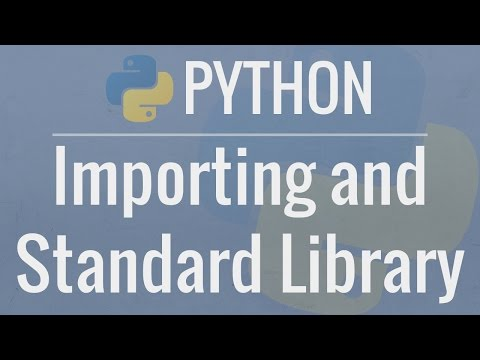

In [17]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('CqvZ3vGoGs0')

And here [another post on the topic](https://www.pythonforthelab.com/blog/complete-guide-to-imports-in-python-absolute-relative-and-more/)

Regarding importing via relative paths, this [stackoverflow discussion](https://stackoverflow.com/questions/21259070/struggling-to-append-a-relative-path-to-my-sys-path) can be enlightening

## Loops in Python

I believe you know all the theory!! So, go [here](https://pynative.com/python-if-else-and-for-loop-exercise-with-solutions/) and get some practice!